In [2]:
import pandas as pd
import matplotlib.pylab as plt
#import kagglehub

# Download latest version https://www.kaggle.com/datasets/fronkongames/steam-games-dataset
#path = kagglehub.dataset_download("fronkongames/steam-games-dataset")

#print("Path to dataset files:", path)
plt.style.use('ggplot')



In [3]:
df =pd.read_csv("games.csv",index_col=False)
steam_df =df.copy()
steam_df.shape

(122611, 39)

## Data Cleaning & Column Reorganization

The original dataset had misaligned columns, so we had to reorganize and relabel them to match the correct data. Additionally, columns that were not relevant to our analysis were dropped to keep the dataset clean and focused.

In [4]:
steam_df.drop(['DiscountDLC count', 'About the game'], axis=1, inplace=True)
clean_columns=['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots',]
steam_df.columns = clean_columns

#Columns to clean the data set
columns_to_drop=["Estimated owners",'Peak CCU','Reviews','Header image', 'Website', 'Support url', 'Support email', 'Metacritic url', 'User score','Positive', 'Negative', 'Score rank','Notes','Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks','Screenshots', 'Supported languages', 'Full audio languages',"Categories",'Tags','Recommendations','About the game']

steam_df.drop(columns_to_drop, axis=1, inplace=True)
steam_df.head()

,AppID,Name,Release date,Required age,Price,Windows,Mac,Linux,Metacritic score,Achievements,Developers,Publishers,Genres
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0,0.00,True,False,False,0,0,NaN,NaN,NaN
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0,5.24,True,False,False,0,0,minori,MangaGamer,Adventure
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0,4.99,True,True,False,0,0,Somer Games,8floor,Casual
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0,8.99,True,False,False,0,19,유진게임즈,유진게임즈,"Casual,Indie,Simulation"
4,3631080,Maze Quest VR,"Apr 24, 2025",0,4.99,True,False,False,0,0,Reality Expanded LLC,Reality Expanded LLC,"Action,Early Access"


## Handling Missing Values

All NaN values found in categorical columns were replaced with "Unknown" to avoid errors during analysis.

In [5]:
steam_df["Developers"] = steam_df["Developers"].fillna("Unknown")
steam_df["Publishers"] = steam_df["Publishers"].fillna("Unknown")
steam_df["Genres"] = steam_df["Genres"].fillna("Unknown")



## Games by Operating System

The following chart shows the number of games available on Steam by supported operating system.Games per Operating system

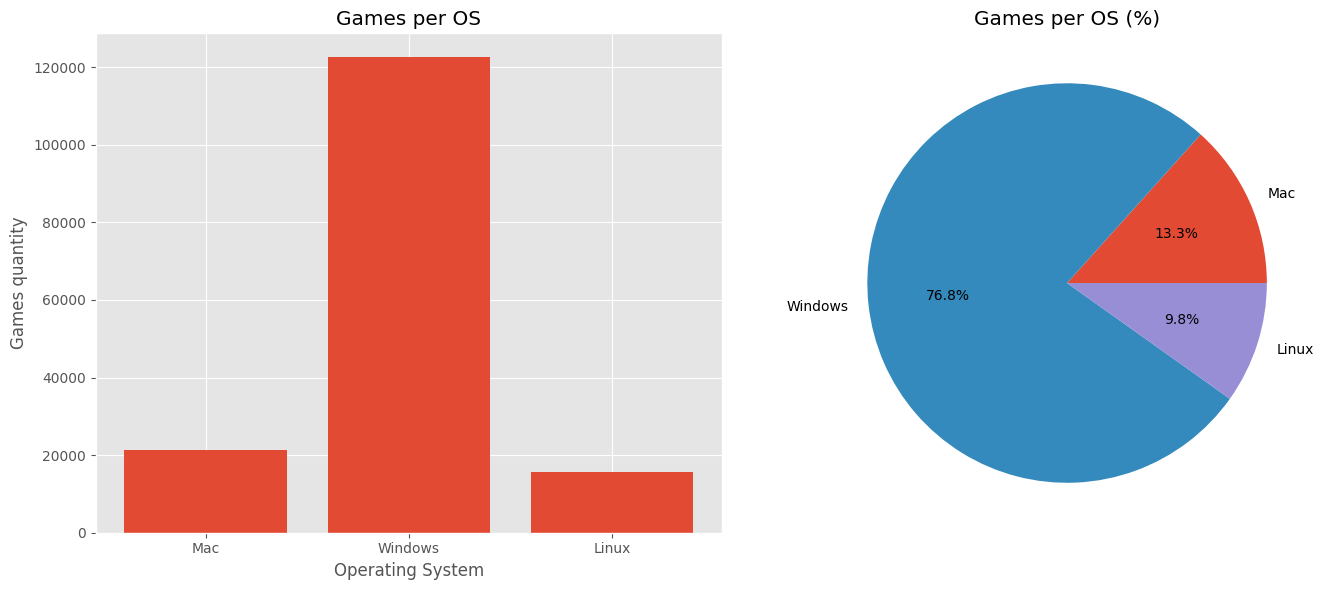

In [27]:
mac_games = steam_df[steam_df["Mac"]].shape[0]
win_games = steam_df[steam_df["Windows"]].shape[0]
linux_games = steam_df[steam_df["Linux"]].shape[0]

labels = ["Mac", "Windows", "Linux"]
values = [mac_games, win_games, linux_games]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
ax1.bar(labels, values)
ax1.set_title("Games per OS")
ax1.set_xlabel("Operating System")
ax1.set_ylabel("Games quantity")

# Pie chart
ax2.pie(values, labels=labels, autopct="%1.1f%%")
ax2.set_title("Games per OS (%)")

plt.tight_layout()
plt.show()


## Games by Required Age

The following chart shows the distribution of games by their required age rating. Games with no age restriction (0) were excluded to better visualize the differences between the remaining age categories.

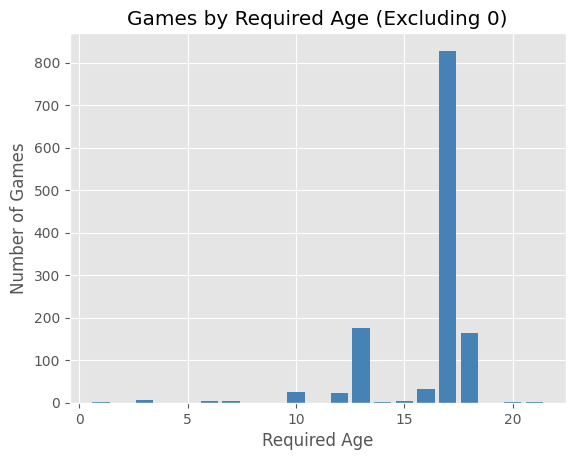

In [7]:
req_age = steam_df[steam_df["Required age"] > 0].groupby("Required age")["Required age"].count()

plt.bar(req_age.index, height=req_age.values, color="steelblue")
plt.title("Games by Required Age (Excluding 0)")
plt.xlabel("Required Age")
plt.ylabel("Number of Games")
plt.show()

## Most Popular Genres on Steam

The following chart shows the top 10 most common genres across all games on Steam. Since each game can belong to multiple genres, the values were split and counted individually.

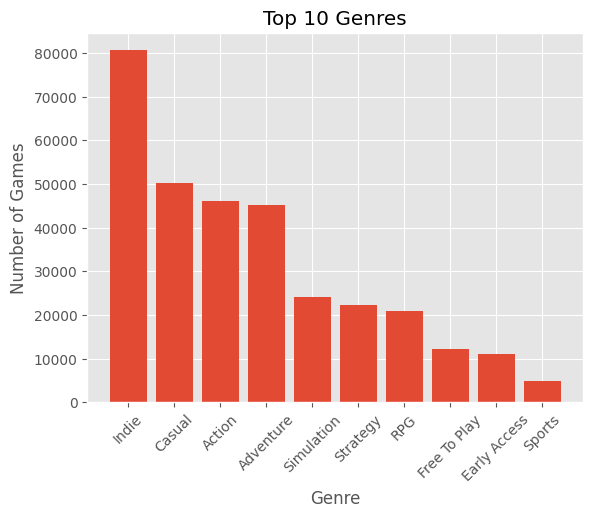

In [8]:
genre_count = steam_df["Genres"].str.split(",").explode().str.strip()
genre_count = genre_count[genre_count != "Unknown"].value_counts().head(10)
plt.bar(genre_count.index, genre_count.values)
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()

## Top 10 Games by Metacritic Score

The following table shows the top 10 highest rated games on Steam according to their Metacritic score.

In [9]:
steam_df[["Name","Metacritic score"]].drop_duplicates(subset="Name").sort_values("Metacritic score", ascending=False,ignore_index=True,).head(10)

,Name,Metacritic score
0,Disco Elysium - The Final Cut,97
1,Baldur's Gate 3,96
2,Grand Theft Auto V Legacy,96
3,Half-Life 2,96
4,BioShock™,96
5,Half-Life,96
6,Persona 5 Royal,95
7,Portal 2,95
8,ELDEN RING,94
9,Quake,94



## Top 10 Publishers on Steam

The following chart displays the top 10 publishers with the most games available on Steam, excluding those with no publisher information.

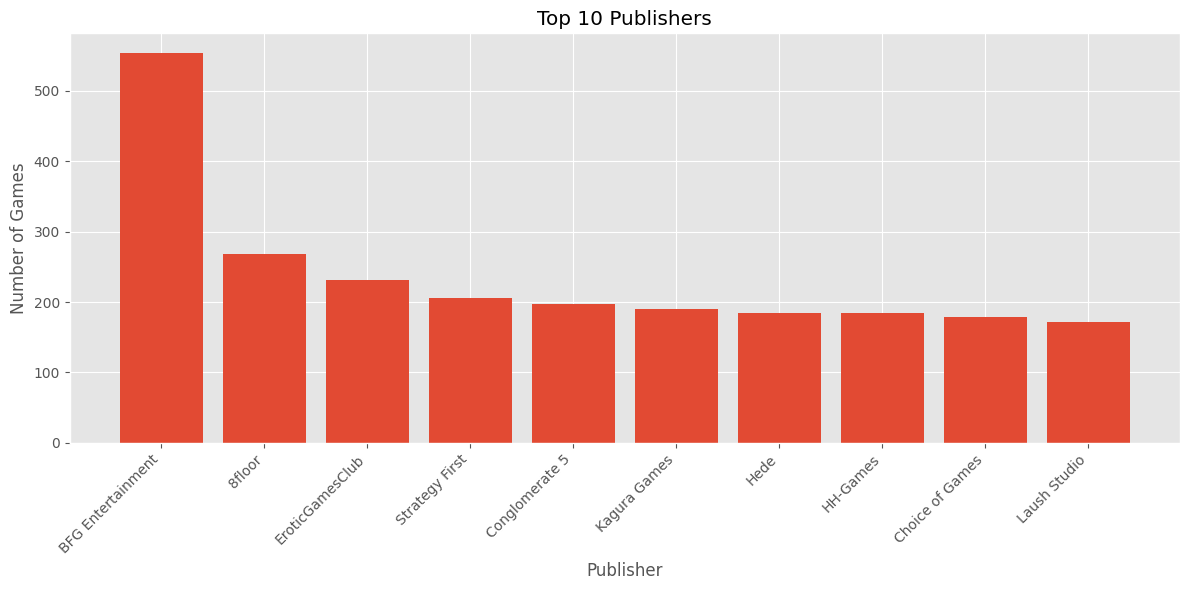

In [10]:
top_publishers = steam_df.groupby("Publishers")["Name"].count().sort_values(ascending=False)
filtered_publishers = top_publishers[top_publishers.index != "Unknown"].head(10)

plt.figure(figsize=(12, 6))
plt.bar(filtered_publishers.index, filtered_publishers.values)
plt.title("Top 10 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Top 10 Developers on Steam

The following chart displays the top 10 developers with the most games on Steam. Unsurprisingly, the top spot goes to an adult content developer — proving that on Steam, there is truly something for everyone.

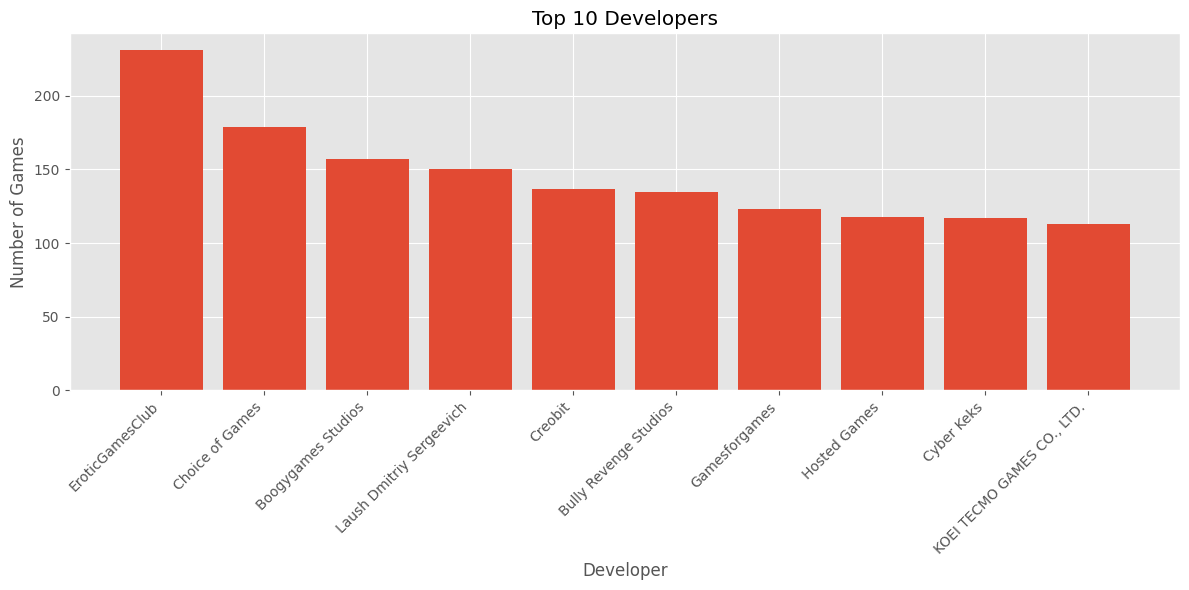

In [11]:
top_publishers = steam_df.groupby("Developers")["Name"].count().sort_values(ascending=False)
filtered_publishers = top_publishers[top_publishers.index != "Unknown"].head(10)

plt.figure(figsize=(12, 6))
plt.bar(filtered_publishers.index, filtered_publishers.values)
plt.title("Top 10 Developers")
plt.xlabel("Developer")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Most Expensive Game on Steam

The following table shows the most expensive game available on Steam, with a price tag of $999.98

In [12]:
max_price = steam_df["Price"].max()
steam_df[steam_df["Price"]== max_price][["Name","Price"]]


,Name,Price
41088,The Leverage Game Business Edition,999.98
68275,The Leverage Game,999.98


## Games with Achievements

The following chart shows the proportion of games on Steam that include an achievement system versus those that do not.

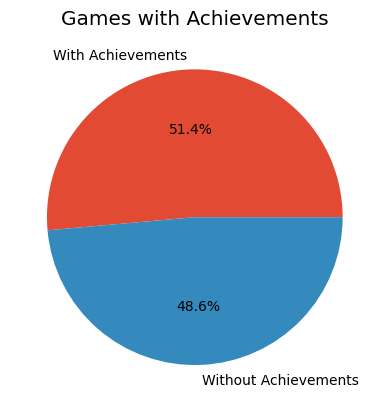

In [28]:
has_achievements = steam_df[steam_df["Achievements"] > 0].shape[0]
no_achievements = steam_df[steam_df["Achievements"] == 0].shape[0]

labels = ["With Achievements", "Without Achievements"]
values = [has_achievements, no_achievements]

plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Games with Achievements")
plt.show()


## Final Report
#### By Itzel Villaseñor

### Conclusions

This analysis of the Steam dataset provided valuable insights into the gaming industry. After cleaning and reorganizing the dataset by removing irrelevant columns and handling missing values, several interesting patterns were found.

Windows dominates the market as the primary gaming platform, while Mac and Linux represent a significantly smaller share of supported games. In terms of content, most games on Steam have no age restriction, and only a small portion require players to be 13, 17 or 18 years old.

Regarding publishers and developers, the data revealed that a few studios concentrate a large number of releases, with adult content developers surprisingly leading the charts. Action and Indie genres proved to be the most popular across the platform, reflecting current trends in game development.

Finally, a notable portion of games include an achievement system, indicating that developers actively use them as a tool to improve player engagement and retention.